In [1]:
import numpy as np
import LcConstructorLAST
import LcFittingLAST
import matplotlib.pyplot as plt 
from gatspy import periodic
import LcPeriod

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['fiveSigmaDepth', 'seeingFwhmEff', 'fieldRA', 'skyBrightness', 'night', 'fieldDec', 'observationStartMJD', 'airmass', 'visitExposureTime', 'filter', 'numExposures']
Found 427547 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
179 Observations total at this sky position (All SNR levels)
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
11 12 35 42 37 42
Period of the model:
0.38351388888888893


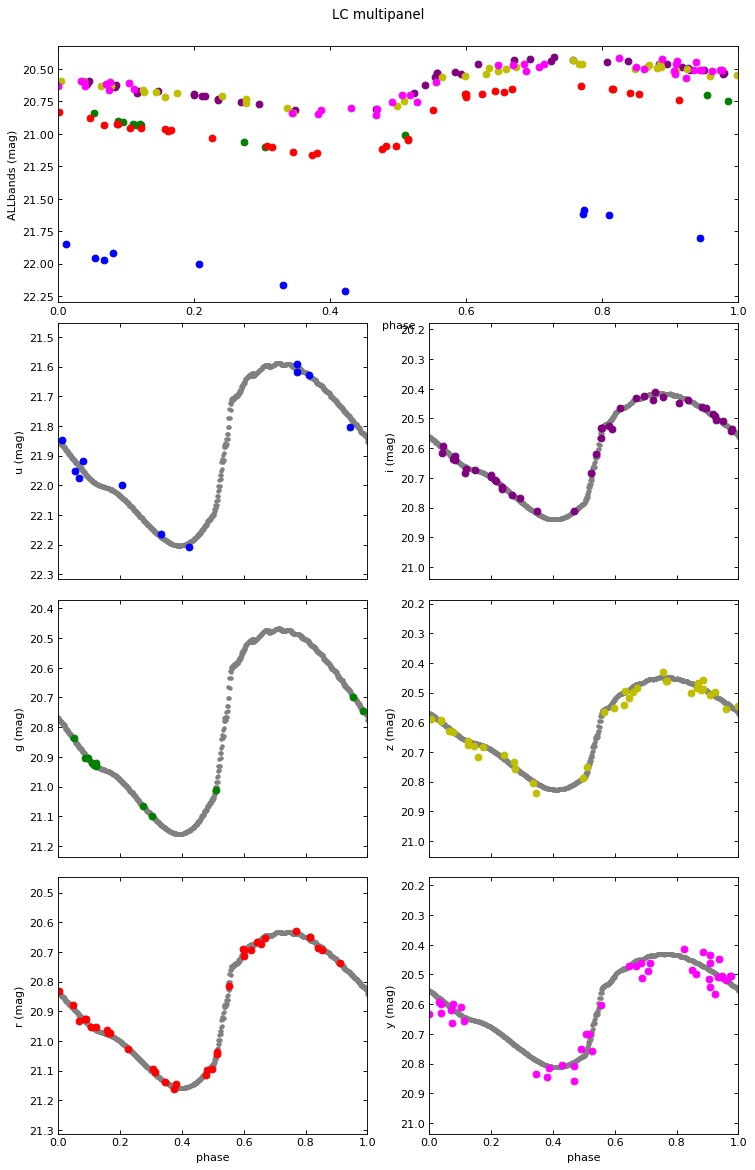

In [3]:
#Let's start!
#Insert Ra and Dec of your observations--->
ra=72.000005
dec=-70.933132
#Insert Distance modulus and E(B-V) of the target--->
dm=20
ebv=0.08
#Insert Opsim: runName and Path--->
#runName='baseline_v1.5_10yrs.db'
#path='/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db'

runName='footprint_add_mag_cloudsv1.5_10yrs.db'
path='/sims_maf/fbs_1.5/footprints/footprint_add_mag_cloudsv1.5_10yrs.db'

#Insert start year and finish year of the survey--->
start=0
finish=2
#Insert the template of  variable star (Choose one of this for the moment RRab.csv,RRc.csv,CEF1.csv,CEF2.csv,LPV1.csv,LPV2.csv)--->
path_ID='./'
modelName='RRc'
modelFileName=modelName+'.csv'
path2=path_ID+modelFileName

#Insert the sigma for the noising--->
sigma_noise=1
#Insert path where figure will be stored if figure=True--->
path3='FIGURE/'
figure=True
#Insert path where sciifiles will be stored if ascii=True--->
path4='FILES/'
optionFile=True
#If this parameter is true the saturated points will be eliminated in the temporal series
do_remove_saturated=True

label=str(modelName)+'_'+('ra{0:06.2f}dec{1:+06.2f}dm'.format(ra,dec))+str(dm)+'ebv'+str(ebv)+'y'+str(start)+'y'+str(finish)+'_'+str(runName)

#Use LcConstructor.py to simulate the temporal series: the results are the ascii file with the temporal series and the figure with the simulated light curve obtained using the period of the model)
LcTeoLSST,LcTeoLSST_noised,LcTheoric,mv,index_notsaturated=LcConstructorLAST.main(ra,dec,dm,ebv,runName,path,start,finish,path2,sigma_noise,path3,figure,path4,optionFile,modelName,do_remove_saturated,label)
period_model=LcTeoLSST['period']
print('Period of the model:' )
print(period_model)

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.04457443117412695 0.05960117267486719
Finding optimal frequency:
 - Estimated peak width = 0.00875
 - Using 5 steps per peak; omega_step = 0.00175
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 12480 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.38351388888888893
 Period found by Gatpy:
0.38351456183438737
 DeltaP/P (in perc):
6.729454984366612e-07
 DeltaP/P*1/number of cycle:
9.374071248847333e-10


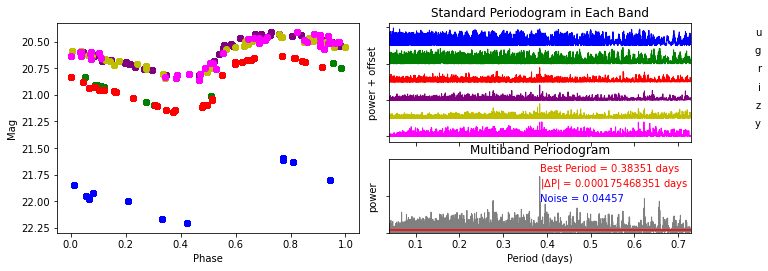

In [4]:
#This cell derive the  period and the noise of Multiband periodogram from simulated light curve with MultibandLombscargle option of Gatspy
#and build a figure that compare  Lombscargle in each band with multiband analysis.
#From https://www.astroml.org/gatspy/periodic/lomb_scargle_multiband.html
#########################################################################
#period range in the periodogram for the plot of the periodogram 
minper_plot=period_model-0.9*period_model
maxper_plot=period_model+ 0.9*period_model
#Step's choice
periods = np.linspace(minper_plot, maxper_plot,10000)
#period range for the optimization of the period's search with LombScargleMultiband
minper_opt=period_model- 0.5*period_model
maxper_opt=period_model+0.5*period_model

########################################################################

best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,
            index_notsaturated,label,path3)
#best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,index_notsaturated,periods,period_model,minper_plot,maxper_plot,minper_opt,maxper_opt,label,path3)



fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


Final results:
<u>,<g>,<r>,<i>,<z>,<y>,=
21.907746153850944 20.839042040776658 20.870547997617145 20.59394269455113 20.617607711291896 20.623660029956724
<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=
0.6010546706837587 0.5590360765924771 0.591224751224722 0.4000108657917032 0.39265929587502413 0.4169917734191877
Chi of the fit=
4.214556298888244e-05 3.267392126192374e-06 7.338316719070862e-05 3.488631982269469e-05 3.115854322605466e-05 6.931642033851437e-05
Max gap dimension (MGD)=
0.3516770663903692 0.44459318164414086 0.1018584280018402 0.11866015114242146 0.1514035682546364 0.232316759630379
Number of gaps >0.5MGD =
1 1 6 2 1 1


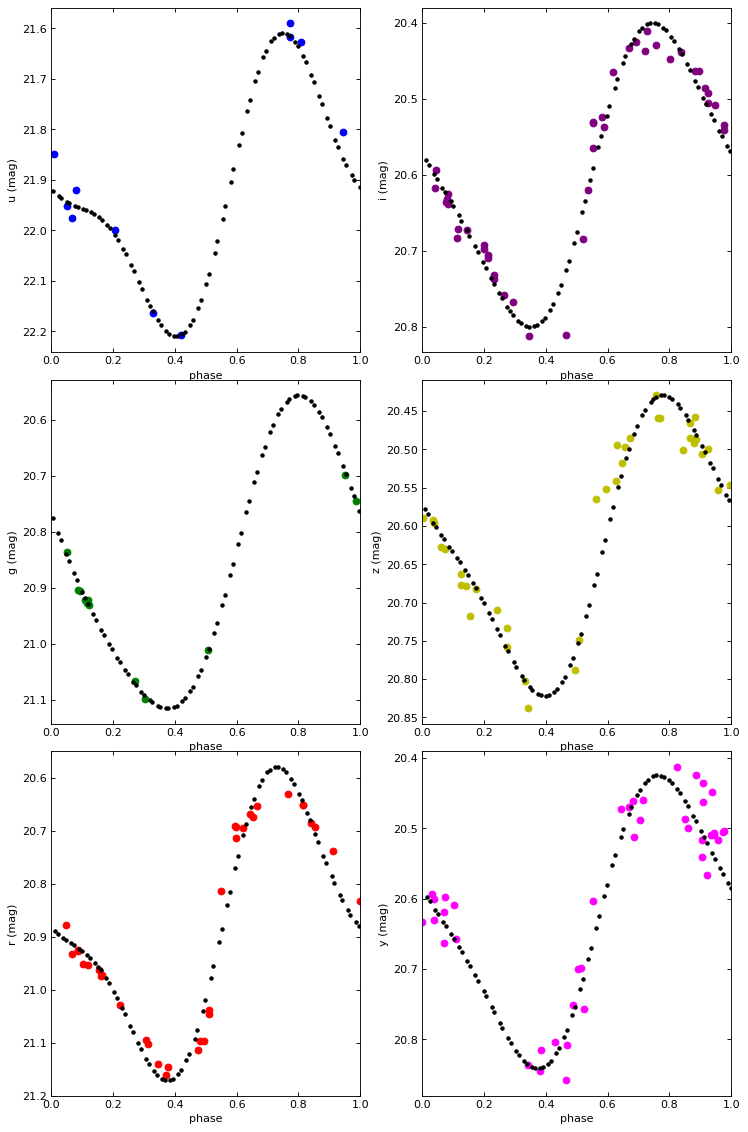

In [5]:
#This cell make the analysis of LC (LcTeoLSST_noised) 
#with index=index_notsaturated with a given period ( period_model or fitLS_multi.best_period):

#You can  change the period and use:
#Period that phase the light curve.(use LcTheoric['time'][0] as zero point as in the previous figures)
period=best_per_temp #or period_model or fitLS_multi.best_period
#The number of harmonics of the model's fit (if NVisits =2*numberOfHarmonics+2 the metric skip to other band without doing  the fit)
numberOfHarmonics=2
#The  value that multiplyes the max distance from two consecutive phases of the light curve (used to count the gaps in  the LC)
factorForDimensionGap=0.5 
outDir=path3


#This metric make the fit of the light curve....(as zeropoint choice LcTheoric['time'][0] or time0)


finalResult=LcFittingLAST.computation(LcTeoLSST_noised,index_notsaturated,period,numberOfHarmonics,factorForDimensionGap,label,outDir)

#...and is useful to have all these information!!
print('Final results:')
print('<u>,<g>,<r>,<i>,<z>,<y>,=')
print(finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'])
print('<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=')
print(finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'])
print('Chi of the fit=')
print(finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'])

print('Max gap dimension (MGD)=')
print(finalResult['maxHoleDimension_u'],finalResult['maxHoleDimension_g'],finalResult['maxHoleDimension_r'],finalResult['maxHoleDimension_i'],finalResult['maxHoleDimension_z'],finalResult['maxHoleDimension_y'])
print('Number of gaps >'+ str(factorForDimensionGap)+'MGD =')
print(finalResult['numberOfHoles_u'],finalResult['numberOfHoles_g'],finalResult['numberOfHoles_r'],finalResult['numberOfHoles_i'],finalResult['numberOfHoles_z'],finalResult['numberOfHoles_y'])